# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 08.03.2024  
**Due date:** 22.03.2024 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project that ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like OpenCV and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

TAs should be able to rerun your code end to end without having any issues. If not, you might lose part of the points during grading.

[iapr]: https://github.com/LTS5/iapr

In [ ]:
1

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-image
!pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 14.6 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 6.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.0 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:

In [3]:
# Check is at least python 3.9
import sys 
assert (sys.version_info.major == 3) and (sys.version_info.minor == 9)

In [4]:
# Import main packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
from typing import Callable
import os
from datetime import datetime

---
# Introduction


In this lab, we will be working with histological data. Histological images are created from tissue samples that are digitized using high-resolution scanners. Without preparation, human tissues lack visual contrast and have poor tissue differentations. To overcome this issue, clinical institutes use chemical staining to artificially enhance contrast. The most famous one is called HE (hematoxylin and eosin) staining. Hematoxylin stains tissue nuclei with a deep purple while eosin focuses more on extracellular matrix components with a pink stain.

Before running the following code make sure that the images are located as follows:

```code
├── labs
│   └── lab_01_iapr.ipynb
└── data
    └── data_lab_01
        ├── tcga_crc_example.png
        └── tcga_blood_example.png
```

By running the following cells you will display a HE histological sample of a colorectal cancer case. It is composed of 3 main entities:
* **Mucin**: Grayish mucus that is secreted by the body. The presence of a tumor tends to increase its presence. 
* **Tumor**: Dark purple aggregates (hematoxylin). Mainly composed of cancerous cells.
* **Other**: Mixture of other cells such as stromal or lymphocytes. It appears mainly pink (eosin) but is dotted with nuclei (purple).

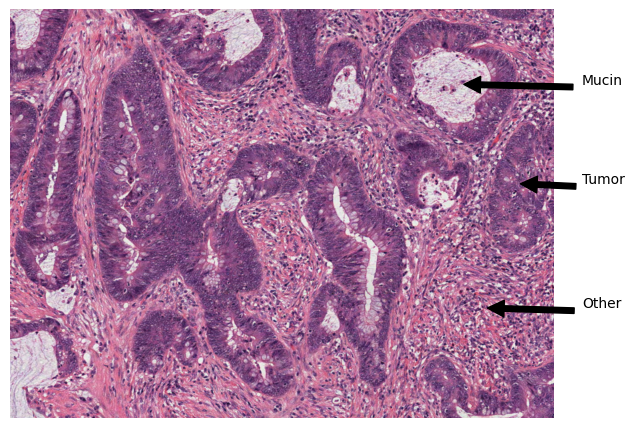

In [6]:
# Define path
path_he = os.path.join("..", "data", "data_lab_01", "tcga_crc_example.png")
# Check if folder and image exist
assert os.path.exists(path_he), "Image not found, please check directory structure"

# Load image
img_he = np.array(Image.open(path_he))

# Display image
plt.imshow(img_he)
plt.axis('off')

# Annotations
plt.annotate('Mucin', xy=(900, 150), xytext=(1150, 150), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Tumor', xy=(1020, 350), xytext=(1150, 350), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Other', xy=(950, 600), xytext=(1150, 600), arrowprops=dict(facecolor='black', shrink=0.05))
plt.tight_layout()


# Part 1 - Segmentation

## Part 1.1 - RBG (3 pts)

**Q1 (1 pts)**: In this section, you will have to complete the function `extract_rgb_channels`. The function should extract and return red, blue, and green channels from the input image `img`. Your function will be fed to `plot_colors` to plot the distribution of the colors in the image. 

In [7]:
def extract_rgb_channels(img):
    """
    Extract RGB channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_red: np.ndarray (M, N)
        Red channel of input image
    data_green: np.ndarray (M, N)
        Green channel of input image
    data_blue: np.ndarray (M, N)
        Blue channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for RGB channels
    data_red = np.zeros((M, N))
    data_green = np.zeros((M, N))
    data_blue = np.zeros((M, N))

    # ------------------
    data_red = img[:, :, 0]   
    data_green = img[:, :, 1] 
    data_blue = img[:, :, 2]  
    # ------------------
    
    return data_red, data_green, data_blue

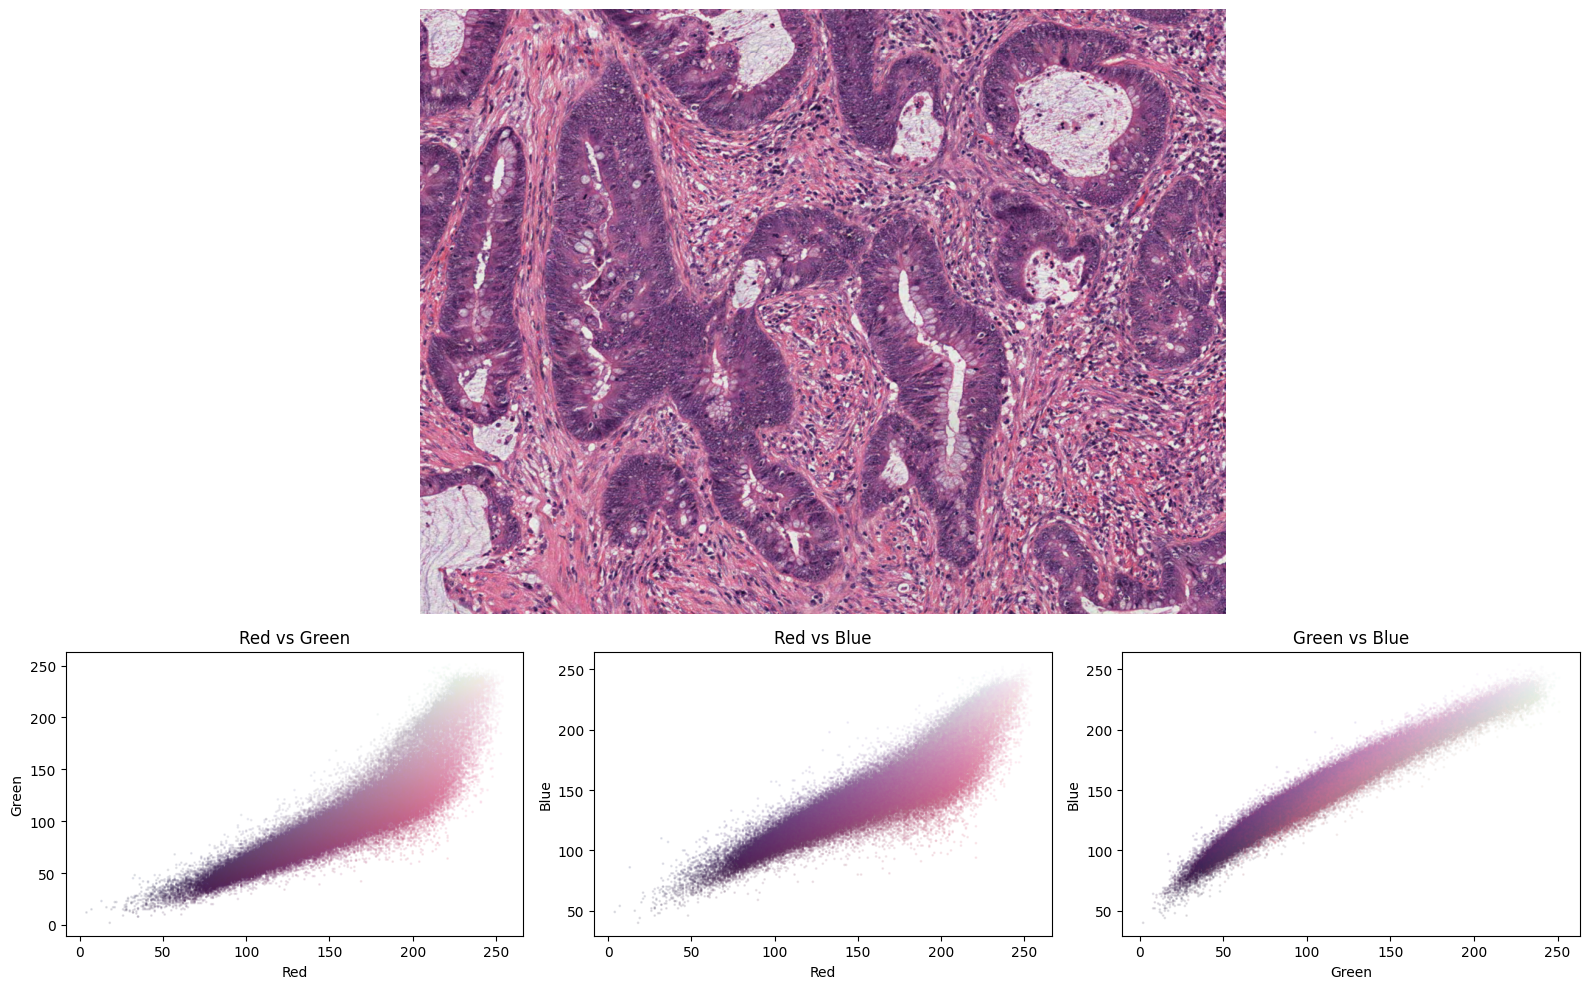

In [8]:
# Plot color space distribution 
def plot_colors_histo(
    img: np.ndarray,
    func: Callable,
    labels: list[str],
):
    """
    Plot the original image (top) as well as the channel's color distributions (bottom).

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    func: Callable
        A callable function that extracts D channels from the input image
    labels: list of str
        List of D labels indicating the name of the channel
    """

    # Extract colors
    channels = func(img=img)
    C2 = len(channels)
    M, N, C1 = img.shape
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, C2)

    # Use random seed to downsample image colors (increase run speed - 10%)
    mask = np.random.RandomState(seed=0).rand(M, N) < 0.1
    
    # Plot base image
    ax = fig.add_subplot(gs[:2, :])
    ax.imshow(img)
    # Remove axis
    ax.axis('off')
    ax1 = fig.add_subplot(gs[2, 0])
    ax2 = fig.add_subplot(gs[2, 1])
    ax3 = fig.add_subplot(gs[2, 2])

    # Plot channel distributions
    ax1.scatter(channels[0][mask].flatten(), channels[1][mask].flatten(), c=img[mask]/255, s=1, alpha=0.1)
    ax1.set_xlabel(labels[0])
    ax1.set_ylabel(labels[1])
    ax1.set_title("{} vs {}".format(labels[0], labels[1]))
    ax2.scatter(channels[0][mask].flatten(), channels[2][mask].flatten(), c=img[mask]/255, s=1, alpha=0.1)
    ax2.set_xlabel(labels[0])
    ax2.set_ylabel(labels[2])
    ax2.set_title("{} vs {}".format(labels[0], labels[2]))
    ax3.scatter(channels[1][mask].flatten(), channels[2][mask].flatten(), c=img[mask]/255, s=1, alpha=0.1)
    ax3.set_xlabel(labels[1])
    ax3.set_ylabel(labels[2])
    ax3.set_title("{} vs {}".format(labels[1], labels[2]))
        
    plt.tight_layout()

# Call plotting function with your implemented function
plot_colors_histo(
    img = img_he,
    func = extract_rgb_channels,
    labels = ["Red", "Green", "Blue"],
)

Based on the result of the plot above

* **Q2 (1 pts)**: Do you think you can find a simple manual thresholding approach to isolate the tumor components? (Justify)
    * **Answer**: ...
* **Q3 (1 pts)**: Implement your own manual thresholding in `apply_rgb_threshold` to estimate the tumor location. Use the function `plot_thresholded_image` below to display your estimation results. Do you think your estimation is reliable? (justify)
    * **Answer**: ...

In [9]:
def apply_rgb_threshold(img):
    """
    Apply threshold to RGB input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract RGB channels
    data_red, data_green, data_blue = extract_rgb_channels(img=img)
    
    # ------------------
    # Define thresholds for each channel
    # These thresholds need to be fine-tuned based on specific image characteristics
    threshold_red = 130
    threshold_green = 100
    threshold_blue = 150
    
    # Apply the thresholds
    # Create a mask where pixels exceed the red threshold and are below the green and blue thresholds
    mask = (data_red < threshold_red) & \
           (data_green < threshold_green) & \
           (data_blue < threshold_blue)
    
    # Apply the mask to isolate the areas of interest, such as tumor regions
    img_th[mask] = 1  # Set the corresponding mask locations to 1 to visualize the thresholded areas
    # ------------------

    # ------------------

    return  img_th

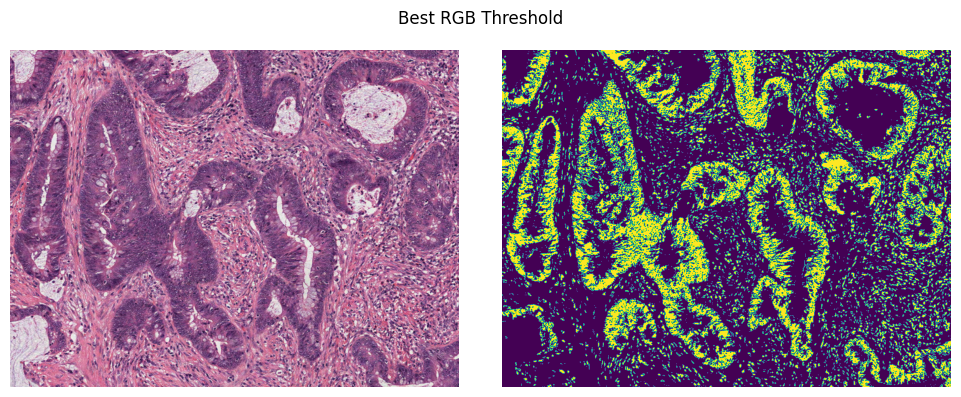

In [10]:
# Plot color space distribution 
def plot_thresholded_image(
    img: np.ndarray,
    func: Callable,
    title: str,
):
    """
    Plot the original image and its thresholded version

    Args
    ----
    img: np.ndarray (M, N, 3)
        Input image of shape MxNx3.
    func: Callable
        Thresholded image.
    title: str
        Title of the plot
    """

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img)
    axes[1].imshow(func(img))
    [a.axis('off') for a in axes]
    plt.suptitle(title)
    plt.tight_layout()

# Plot best RGB thresholding
plot_thresholded_image(img=img_he, func=apply_rgb_threshold, title="Best RGB Threshold")

## Part 1.2 - Other colorspaces (3 pts)

So far we used the standard RGB colorspace to apply our thresholding. In this section, you will convert the image to a different color space. 

* **Q1 (1 pts)**: Use de function `rgb2hsv` from the skimage package ([see doc](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html)) to convert the input image from RGB to HSV in function `extract_hsv_channels`.
* **Q2 (1 pts)**: Can you see any difference between the use of the RGB or HSV space? (justify)
    * **Answer**: ...

In [13]:
from skimage.color import rgb2hsv

In [14]:
def extract_hsv_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # ------------------
    # Convert the RGB image to HSV
    img_hsv = rgb2hsv(img)
    # Extract the H, S, and V channels
    data_h = img_hsv[:, :, 0]  # Hue channel
    data_s = img_hsv[:, :, 1]  # Saturation channel
    data_v = img_hsv[:, :, 2]  # Value channel
    # ------------------
    
    return data_h, data_s, data_v

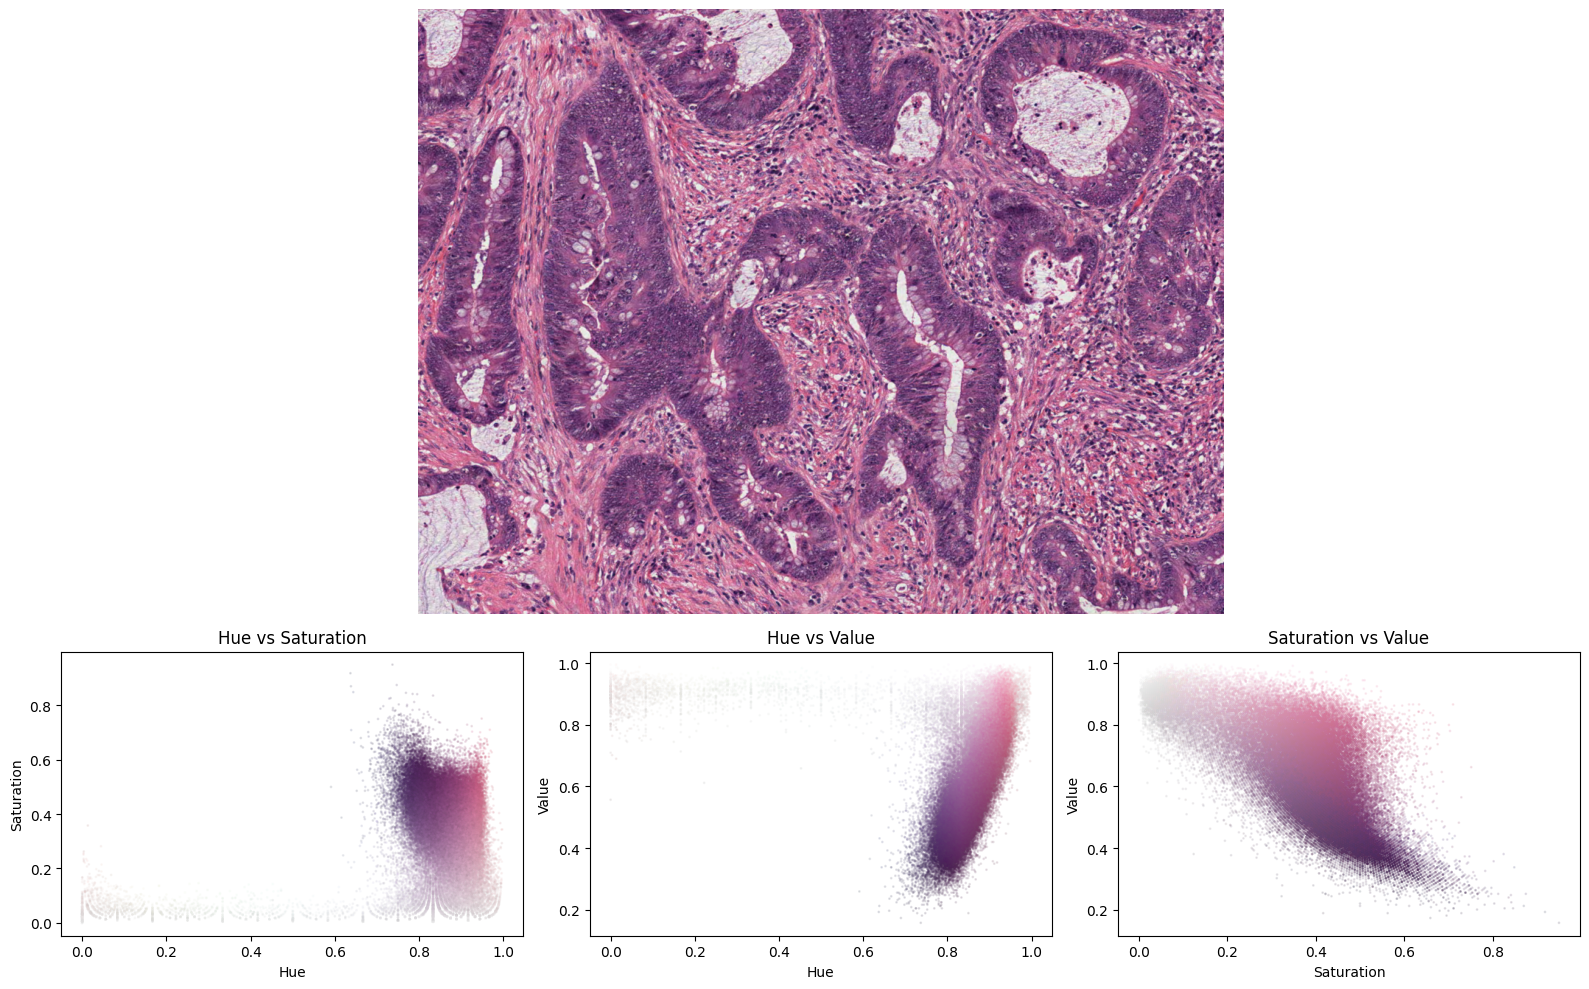

In [15]:
# Call plotting function with your implemented function
plot_colors_histo(
    img = img_he,
    func = extract_hsv_channels,
    labels = ["Hue", "Saturation", "Value"],
)

* **Q3 (1 pts)**: Based on your results, try again to find the best manual threshold in function `apply_hsv_threshold`. Do you think your estimation is reliable? (justify)
    * **Answer**: ...

In [16]:
def apply_hsv_threshold(img):
    """
    Apply threshold to the input image in hsv colorspace.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract HSV channels
    data_h, data_s, data_v = extract_hsv_channels(img=img)
    
    # ------------------
    # Define thresholds based on the scatter plots
    # We need to visually inspect the plots to set these values
    threshold_hue_low = 0.65  # This would need to be set based on the Hue vs Saturation plot
    threshold_hue_high = 0.85  # This is just a placeholder
    threshold_saturation = 0.35  # Assuming that we are interested in highly saturated regions
    threshold_value = 0.65  # Assuming that we are interested in brighter regions

    # Create a mask where the conditions are met
    mask = ((data_h >= threshold_hue_low) & (data_h <= threshold_hue_high) &
            (data_s >= threshold_saturation) &
            (data_v <= threshold_value))
    
    # Apply the mask to the image
    img_th[mask] = 1
    
    # ------------------
    
    return  img_th

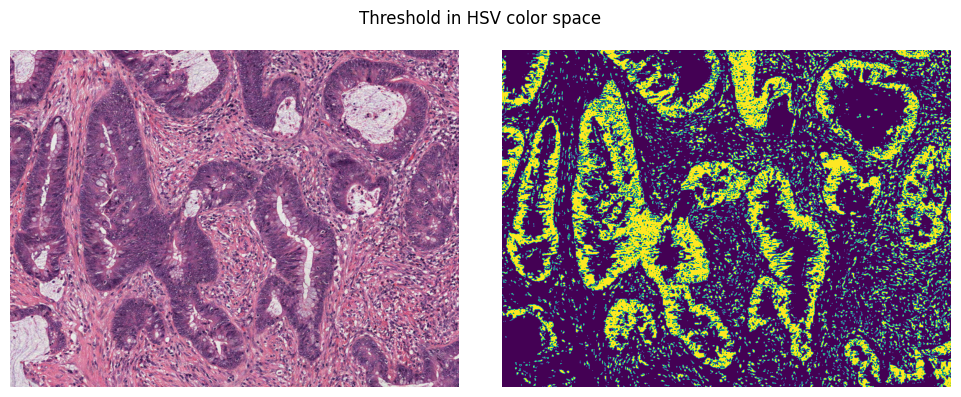

In [17]:
# Find threshold(s) in the hsv channels
plot_thresholded_image(img=img_he, func=apply_hsv_threshold, title="Threshold in HSV color space")

## Part 1.3 - Morphology (5 pts)

To proceed, we will use your results from the previous thresholding (namely `apply_hsv_threshold`) as the starting point. In this exercise, we will try to clean the masked images using morphology to get a better estimation of the tumor area.

* **Q1 (1 pts)** Implement the functions `apply_closing` and `apply_opening` with operations `closing` ([see doc](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.closing)), `opening` ([see doc](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.opening)) using the disk sizes arguments ([see doc](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk)).
* **Q2 (1 pts)** We test disk sizes: $1, 2, 5, 10$. Comment on the quality of the results.
    * **Answer**: ...

In [ ]:
def apply_closing(img_th, disk_size):
    """
    Apply closing to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for closing

    Return
    ------
    img_closing: np.ndarray (M, N)
        Image after closing operation
    """

    # Define default value for output image
    img_closing = np.zeros_like(img_th)

    # ------------------
    # Your code here ... 
    # ------------------

    return img_closing


def apply_opening(img_th, disk_size):
    """
    Apply opening to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for opening

    Return
    ------
    img_opening: np.ndarray (M, N)
        Image after opening operation
    """

    # Define default value for output image
    img_opening = np.zeros_like(img_th)

    # ------------------
    # Your code here ... 
    # ------------------

    return img_opening


In [ ]:
def plot_images(
    imgs: np.ndarray,
    sizes: list[int],
    title: str,
):
    """
    Plot multiple images. The title of each subplot is defined by the disk_size elements.

    Args
    ----
    imgs: np.ndarray (D, M, N)
        List of D images of size MxN.
    disk_sizes: list of int
        List of D int that are the size of the disk used for the operation
    title:
        The overall title of the figure
    """
    D = len(imgs)
    ncols = int(np.ceil(D/2))
    fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(10, 4*ncols))
    
    # Remove axis
    axes = axes.ravel()
    [ax.axis('off') for ax in axes]
    
    for i in range(D):
        axes[i].imshow(imgs[i])
        axes[i].set_title("Size: {}".format(sizes[i]))
    
    plt.suptitle(title)
    plt.tight_layout()       

In [ ]:
# Define disk sizes
disk_sizes = [1, 2, 5, 10]
imgs_closing = []
imgs_opening = []
# Apply threhsold in HSV space
img_th = apply_hsv_threshold(img_he)

# Apply opening and closing to masked image 
for d in disk_sizes:
    imgs_closing.append(apply_closing(img_th, d))
    imgs_opening.append(apply_opening(img_th, d))
    
# Plot results
plot_images(imgs=imgs_closing, sizes=disk_sizes, title="Closing")
plot_images(imgs=imgs_opening, sizes=disk_sizes, title="Opening")

* **Q3 (1 pts)** Implement the functions `remove_holes` and `remove_objects` using operations [remove_small_holes](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_holes), [remove_small_objects](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.remove_small_objects) from skimage package, respectively.
* **Q4 (1 pts)** We test the functions using area sizes: $10, 50, 100$, and $500$. Comment on the quality of the results.
    * **Answer**: ...

In [ ]:
def remove_holes(img_th, size):
    """
    Remove holes from input image that are smaller than size argument.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    size: int
        Minimal size of holes

    Return
    ------
    img_holes: np.ndarray (M, N)
        Image after remove holes operation
    """

    # Define default value for input image
    img_holes = np.zeros_like(img_th)

    # ------------------
    # Your code here ... 
    # ------------------

    return img_holes


def remove_objects(img_th, size):
    """
    Remove objects from input image that are smaller than size argument.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    size: int
        Minimal size of objects

    Return
    ------
    img_obj: np.ndarray (M, N)
        Image after remove small objects operation
    """

    # Define default value for input image
    img_obj = np.zeros_like(img_th)

    # ------------------
    # Your code here ... 
    # ------------------

    return img_obj


In [ ]:
# Define area sizes
sizes = [10, 50, 100, 500]
imgs_holes = []
imgs_objects = []
# Apply threhsold in HSV space
img_th = apply_hsv_threshold(img_he)

# Remove holes and objects from masked image 
for d in sizes:
    imgs_holes.append(remove_holes(img_th, d))
    imgs_objects.append(remove_objects(img_th, d))
    
# Plot results    
plot_images(imgs=imgs_holes, sizes=sizes, title="Remove small holes")
plot_images(imgs=imgs_objects, sizes=sizes, title="Remove small objects")

* **Q5 (1 pts)** Based on your previous results, implement the function `apply_morphology` that combines morphology functions to improve your tumor detection results from HSV thresholding.

In [ ]:
def apply_morphology(img_th):
    """
    Apply morphology to thresholded image

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.

    Return
    ------
    img_morph: np.ndarray (M, N)
        Image after morphological operations
    """

    img_morph = np.zeros_like(img_th)
    
    # ------------------
    # Your code here ... 
    # ------------------
    
    return img_morph

In [ ]:
def plot_morphology_best(
    img_source: np.ndarray,
    img_best: np.ndarray,
):
    """
    Plot the original images beside the best tumor estimation

    Args
    ----
    img_source: np.ndarray (M, N, 3)
        RGB source image.
    img_best: np.ndarray (M, N)
        Best thresholded image.
    """
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    # Remove axis
    axes = axes.ravel()
    [ax.axis('off') for ax in axes]
    axes[0].imshow(img_source)
    axes[1].imshow(img_best)
    axes[0].set_title("Source")
    axes[1].set_title("Tumor estimation")
    
    plt.tight_layout() 

plot_morphology_best(
    img_source=img_he,
    img_best=apply_morphology(apply_hsv_threshold(img_he)),
)

## Part 1.4 - Region Growing (4 pts)

* **Q1 (3 pts)** In this section we ask you to implement from scratch your own `region_growing` function to detect the tumor area. The function should take as input an RGB image, seeds that are manual initialization points in the tumor area, and the maximum number of iterations to perform. Note that the function also includes the kwargs argument. You can use it to add additional parameters to your function if needed (see [doc kwargs](https://book.pythontips.com/en/latest/args_and_kwargs.html))
* **Q2 (1 pts)** Your function is then used to perform region growing using multiple iterations. Comment on the quality of the results based on the number of iterations performed as well as the running time.
    * **Answer**: ...

In [ ]:
def region_growing(
    seeds: list[tuple],
    img: np.ndarray,
    n_max: int = 10,
    **kwargs,
):
    """
    Run region growing on input image using seed points.

    Args
    ----
    seeds: list of tuple
        List of seed points
    img: np.ndarray (M, N, C)
        RGB image of size M, N, C
    n_max: int
        Number maximum of iterations before stopping algorithm
    kwargs: 
        Additional arguments if you need (ex: variance max, channel to use, etc...)

    Return
    ------
    rg: np.ndarray (M, N)
        Image after region growing has been performed
    """
    
    M, N, C = img.shape
    rg = np.zeros((M, N)).astype(bool)
    
    # ------------------
    # Your code here ... 
    # ------------------
                    
    return rg

In [ ]:
def plot_region_growing(
    seeds: list[tuple],
    img: np.ndarray,
    func: Callable,
    iters: list[int],
):
    """
    Plot the region growing results based on seeds, function and iterations
    
    Args
    ----
    seeds: list of tuple
        List of seed points
    img: np.ndarray (M, N, C)
        RGB image of size M, N, C
    func: callable
        Region growing function
    iters: list of ints
        Number of iteration to plot
    """

    # Define plot size
    n = len(iters) + 1
    n_rows = np.ceil(n // 2).astype(int)
    _, axes = plt.subplots(n_rows, 2, figsize=(16, 6*n_rows))
    axes = axes.ravel()
    [a.axis('off') for a in axes]   

    # Reference image
    axes[0].imshow(img)
    axes[0].set_title("Input image")

    # Plot all iterations
    for i, it in enumerate(iters):
        t1 = datetime.now()
        img_rg = region_growing(seeds=seeds, img=img, n_max=iters[i])
        # Compute time difference in seconds
        t2 = datetime.now()
        seconds = (t2 - t1).total_seconds()
        axes[i+1].imshow(img_rg)
        axes[i+1].set_title("RG {} iter in {:.2f} seconds".format(iters[i], seconds))
                            
    plt.tight_layout()
    

In [ ]:
# Set manual seeds (located inside tumor blobs)
seeds = [
    (50, 80), (450, 300), (400, 100), (200, 10), (640, 80), 
    (650, 300), (100, 400), (100, 650), (90, 800), (330, 810), 
    (350, 1000), (500, 690),  (800, 1050), 
]

plot_region_growing(
    seeds=seeds,
    img=img_he,
    func=region_growing,
    iters=[20, 100, 1000],
)

## Part 1.5 - Final Comparison (1 pts)

* **Q1 (1 pts)** Run the cell below. Based on your observation, which approach do you think gives the best estimation of the tumor area? (justify)
    * **Answer**: ...

In [ ]:
_, axes = plt.subplots(2, 2, figsize=(16, 12))

# Remove axis
axes = axes.ravel()
[a.axis('off') for a in axes]

# Original image
axes[0].imshow(img_he)
# Detections
axes[1].imshow(apply_hsv_threshold(img_he))
axes[1].set_title("HSV Threshold")
axes[2].imshow(apply_morphology(apply_hsv_threshold(img_he)))
axes[2].set_title("HSV Thresh + Morphology")
axes[3].imshow(region_growing(seeds=seeds, img=img_he, n_max=1000))
axes[3].set_title("Region Growing")
plt.tight_layout()

---
# Part 2 - Sandbox [6 pts]

For the second part, you will work on a new HE case without help. This time we ask you to
* **Q1 (3 pts)**: detect and compute the area of the blood cells,
* **Q2 (3 pts)**: detect and compute the area of the mucin.

Provide your results to the function `plot_results`. See the example below. Be careful, the completely white area is not mucin. It is the slide background and should be discarded. Moreover, you can focus on the large blood cell aggregates (large red areas)

In [ ]:
# Load image
path_he2 = os.path.join("..", "data", "data_lab_01", "tcga_blood_example.png")
# Check if folder and image exist
assert os.path.exists(path_he2), "Image not found, please check directory structure"
img_he2 = np.array(Image.open(path_he2))

# Display image
plt.figure(figsize=(14, 7))
plt.imshow(img_he2)
plt.axis('off')
plt.tight_layout()

# Annotations
plt.annotate('Background', xy=(1150, 50), xytext=(2000, 50), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Blood', xy=(120, 280), xytext=(2000, 280), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Mucin', xy=(1600, 600), xytext=(2000, 600), arrowprops=dict(facecolor='black', shrink=0.05))
plt.tight_layout()

In [ ]:
M, N, C = np.shape(img_he2)
mask_blood = np.zeros((M, N))
mask_mucin = np.zeros((M, N))

# ------------------
# Your code here ... 
# ------------------
                    

In [ ]:
def plot_results(
    img: np.ndarray,
    mask_blood: np.ndarray,
    mask_mucin: np.ndarray,
):
    """
    Plot the blood and mucin detection as well as the estimated area in pixels
    
    Args
    ----
    img: np.ndarray (M, N, C)
        Reference RGB input image
    mask_blood: np.ndarray (M, N)
        Estimation mask of the blood aggregates
    mask_mucin: np.ndarray (M, N)
        Estimation mask of the mucin area
    """
    
    _, axes = plt.subplots(1, 3, figsize=(16, 6))
    [a.axis("off") for a in axes]

    area_blood = np.sum(mask_blood)
    area_mucin = np.sum(mask_mucin)
    
    # Image
    axes[0].imshow(img)
    axes[0].set_title("Original image")
    # Mask blood
    axes[1].imshow(img)
    axes[1].imshow(mask_blood, alpha=0.8)
    axes[1].set_title("Blood detection (area: {:.0f})".format(area_blood))
    # Mask mucin
    axes[2].imshow(img)
    axes[2].imshow(mask_mucin, alpha=0.8)
    axes[2].set_title("Mucin detection (area: {:.0f})".format(area_mucin))
    plt.tight_layout()

plot_results(img=img_he2, mask_blood=mask_blood, mask_mucin=mask_mucin)